In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

df = pd.read_csv('./dataset-19713.csv')
OUTDATED_IGNORE=1

The Channing House Dataset contains info on the residents of Channing House retirement centre in Palo Alto, California. I downloaded the dateset from https://www.picostat.com/dataset/r-dataset-package-boot-channing. <br>The data was collected from 1964 to 01/07/1975.
The dataset has 462 rows and 6 columns:<br>
1.<i> obs - resident number - numerical data</i>
<br>
2. death - 1 indicates that the resident died at Channing House, 0 indicates that they left the house prior to July 1, 1975 or that they were still alive and living in the centre at that date - categorical data<br>
3. ageentry - the residents age (in months) on entry to the centre - numerical data<br>
4. age - the age (in months) at which the resident died (if they died during their stay), leaving the centre (if they left prior to 1st of July 1975) or July 1st 1975, whichever event occurred first - numerical data<br>
5. time - the length of time (in months) that the resident spent at Channing House - numerical data<br>
6. gender - resident's sex (1 -male or 2 - female) - categorical data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   obs       462 non-null    int64
 1   death     462 non-null    int64
 2   ageentry  462 non-null    int64
 3   age       462 non-null    int64
 4   time      462 non-null    int64
 5   gender    462 non-null    int64
dtypes: int64(6)
memory usage: 21.8 KB


/home/sylwia/anaconda3/envs/kurs/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/sylwia/anaconda3/envs/kurs/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
df.isnull().sum()

obs         0
death       0
ageentry    0
age         0
time        0
gender      0
dtype: int64

From the dataframe summary, we can infer that the set contains 462 rows and that there are no missing values in any of the columns.

In [4]:
df.head(10)

,obs,death,ageentry,age,time,gender
0,1,1,1042,1172,130,2
1,2,1,921,1040,119,2
2,3,1,885,1003,118,2
3,4,1,901,1018,117,2
4,5,1,808,932,124,2
5,6,1,915,1004,89,2
6,7,1,901,1023,122,2
7,8,1,852,908,56,2
8,9,1,828,868,40,2
9,10,1,968,990,22,2


### Gender of residents

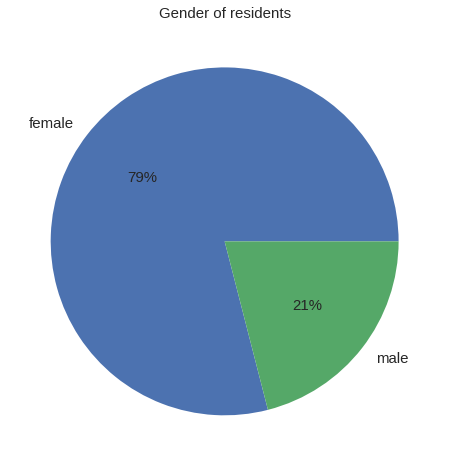

In [5]:
gender = df.copy()
gender_names = {1 : 'male', 2 : 'female'}
def gender_name(gender):
     return gender_names.get(gender)
gender['gender'] = gender['gender'].apply(gender_name)
gender = gender['gender'].value_counts()
gender = gender.reset_index()

plt.pie(gender['gender'], labels=['female', 'male'], autopct='%1.f%%', textprops={'fontsize': 15})
plt.title('Gender of residents', size=15)
plt.show()

In [6]:
gender

,index,gender
0,female,365
1,male,97


Most of Channing House residents were women - 79% (365 residents), 21% were men (97 residents).
### "Status" of the resident
The next column in the dataset is "death", which informs us whether the resident died while staying in the Channing House - 1, or the resident was still alive on 01.07.1975 - 0.


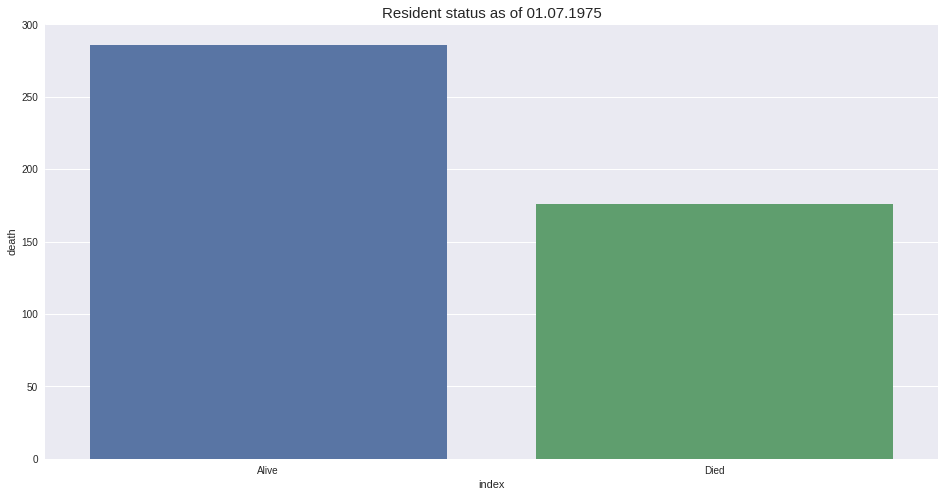

In [7]:
status = df['death'].value_counts()
status = status.reset_index()
status_names = {0: 'Alive', 1: 'Died'}
def status_name(status):
    return status_names.get(status)
status['index'] = status['index'].apply(status_name)
sns.barplot(data=status, x='index', y='death')
plt.title("Resident status as of 01.07.1975", size=15)
plt.show()

In [8]:
status

,index,death
0,Alive,286
1,Died,176


The above chart and the summary table show that on 01/07/1975 286 residents were alive and 176 residents died at Channing House.

###  Resident's age at the time of moving into Channing House
Column "ageentry" contains information on the age (in months) the particular residents moved into the center.
In order to make the data more easily understandable I calculated the age in years and rounded the number down.


In [9]:
df['ageentry'] = df['ageentry']//12

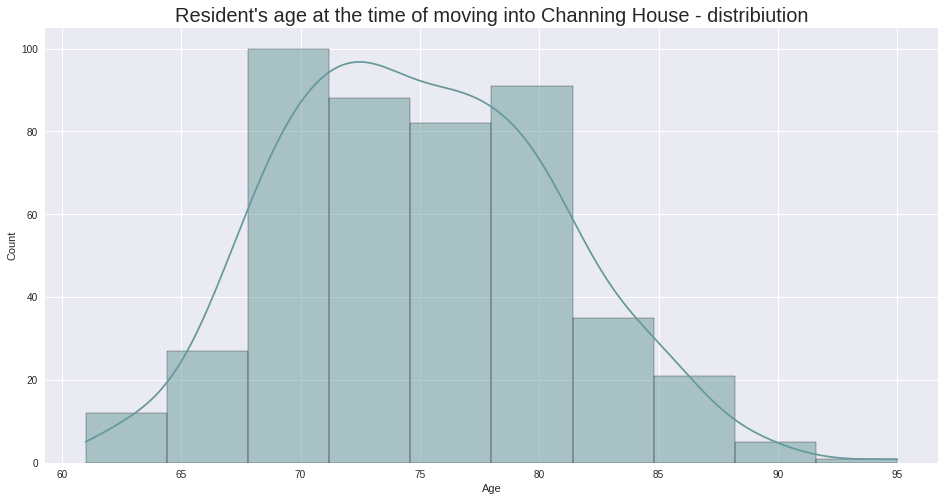

In [10]:
sns.histplot(x='ageentry',data=df,bins=10,kde=True, color='#669999' )
plt.xlabel('Age')
plt.title('Resident\'s age at the time of moving into Channing House - distribiution', size=20)
plt.show()

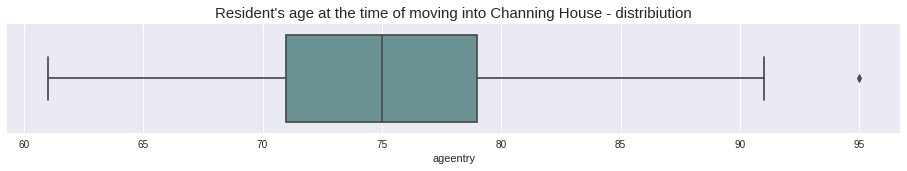

In [11]:
plt.figure(figsize=(16, 2))
sns.boxplot(x='ageentry',data=df, color='#669999')
plt.title('Resident\'s age at the time of moving into Channing House - distribiution', size=15)
plt.show()

In [12]:
df['ageentry'].describe()

count    462.000000
mean      75.006494
std        5.766795
min       61.000000
25%       71.000000
50%       75.000000
75%       79.000000
max       95.000000
Name: ageentry, dtype: float64

From the above histogram, the boxplot plot and the summary table for this column, we can infer:
1. The average age of moving into Channing House is 75,
2. The median age of moving into Channing House is also 75,
2. Most observations in this column come from the age group of 71-79,
2. The youngest person moving into Channing House was 61 and the oldest was 95,
3. The oldest person also turned out to be an outlier.

### Age of residents
In the "age" column we have information about the resident's age at the time of death, leaving the center or 01/07/1975, whichever event occured first. As previously, for a better understanding of the data, I converted the months to years and rounded the numbers down.

In [13]:
df['age'] = df['age']//12

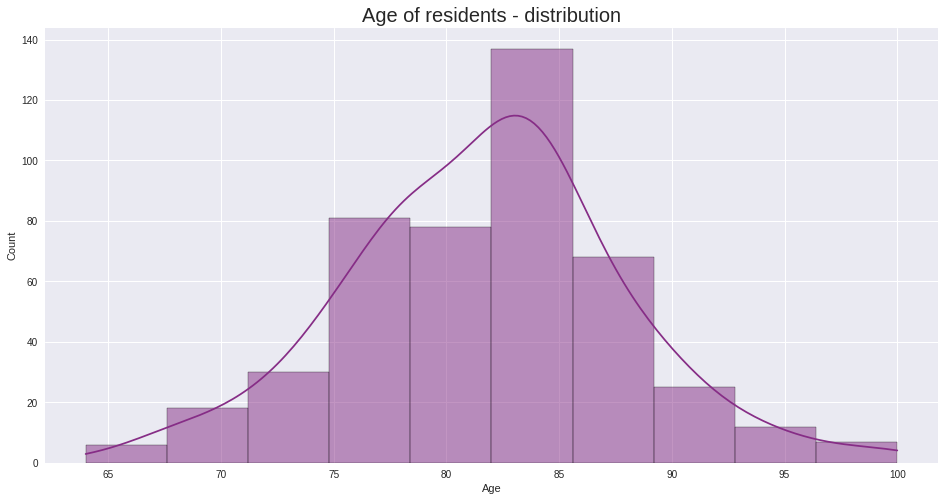

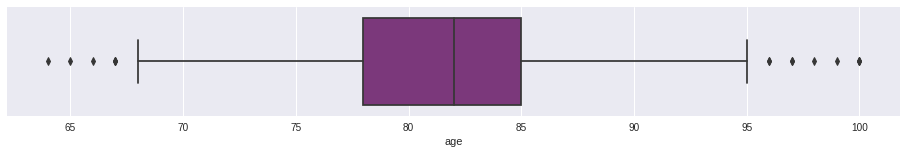

In [14]:
sns.histplot(x='age',data=df, bins=10,kde=True, color='#862d86' )
plt.xlabel('Age')
plt.title('Age of residents - distribution', size=20)
plt.show()
plt.figure(figsize=(16, 2))
sns.boxplot(x='age',data=df, color='#862d86')
plt.show()

In [15]:
df['age'].describe()

count    462.000000
mean      81.707792
std        6.165391
min       64.000000
25%       78.000000
50%       82.000000
75%       85.000000
max      100.000000
Name: age, dtype: float64

From the summary table and the charts for the age of residents, we can infer:
1. The average age of the resident is 81.7, which is about 82 years,
2. The median age of the resident is also 82 years,
3. The youngest resident was 64 years old, and the oldest was 100 years old,
4. Most of the residents were aged between 78 and 85.
3. For this variable, we observed more outliers on both the left and right sides of the distribution.

### Length of stay in nursing home
The "time" column gives us the length of time (in months) that the resident spent in Channing House.

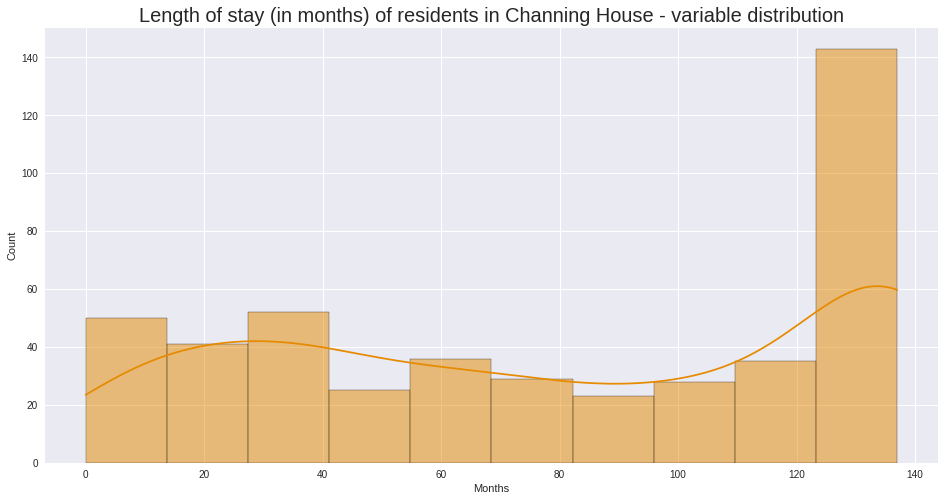

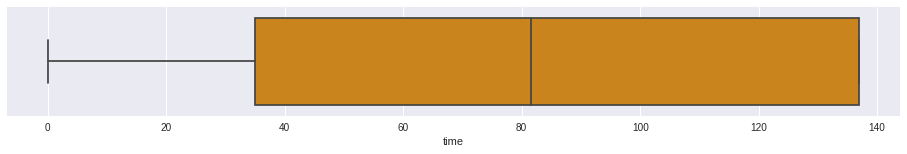

In [16]:
sns.histplot(x='time',data=df,bins=10,kde=True, color='#e68a00' )
plt.xlabel('Months')
plt.title('Length of stay (in months) of residents in Channing House - variable distribution', size=20)
plt.show()
plt.figure(figsize=(16, 2))
sns.boxplot(x='time',data=df, color='#e68a00')
plt.show()

In [17]:
df['time'].describe()

count    462.000000
mean      80.119048
std       48.247924
min        0.000000
25%       35.000000
50%       81.500000
75%      137.000000
max      137.000000
Name: time, dtype: float64

Based on the graphs and the summary table for the length of stay of a resident in Channing House, we infer:
1. The average length of stay in Channing House was 80 months, with a median of 81.5 months,
2. The shortest duration of stay was 0 months and the longest is 137 months,
2. Most often, the length of stay was in the range from 35 to 137 months.
2. No outliers.

### Age at move-in for females.
For the purposes of analyzing the age(in years) of women at the time of moving into Channing House, I will create a new data frame that will only contain data on women.

In [18]:
women = df.loc[df['gender'] ==2]
women

,obs,death,ageentry,age,time,gender
0,1,1,86,97,130,2
1,2,1,76,86,119,2
2,3,1,73,83,118,2
3,4,1,75,84,117,2
4,5,1,67,77,124,2
...,...,...,...,...,...,...
360,361,1,80,82,22,2
361,362,1,79,82,35,2
362,363,1,69,75,74,2
363,364,1,71,76,54,2


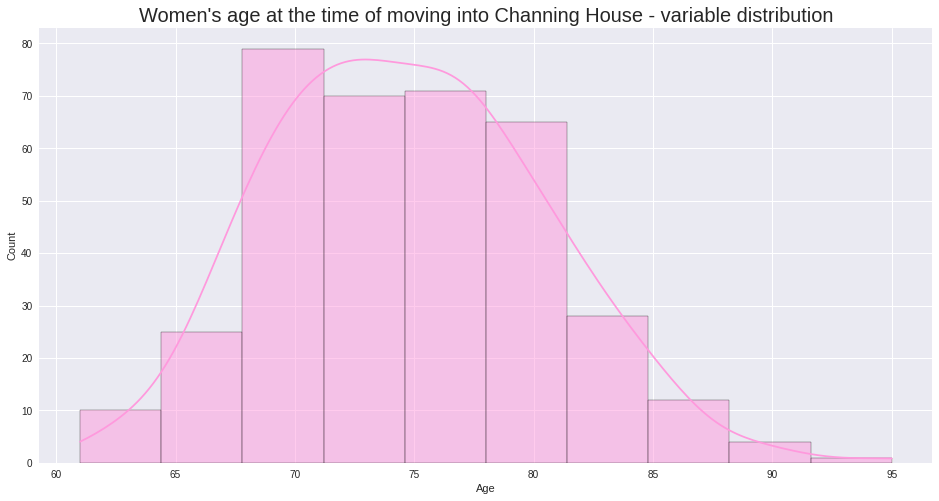

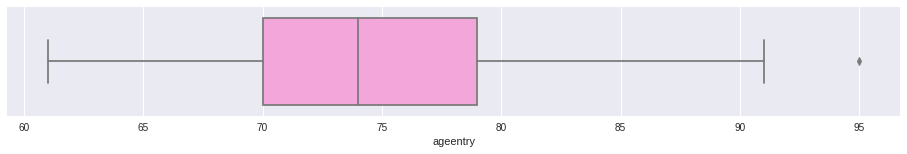

In [19]:
sns.histplot(x='ageentry',data=women,bins=10,kde=True, color='#ff99dd' )
plt.xlabel('Age')
plt.title('Women\'s age at the time of moving into Channing House - variable distribution', size=20)
plt.show()
plt.figure(figsize=(16, 2))
sns.boxplot(x='ageentry',data=women, color='#ff99dd')
plt.show()

In [20]:
women['ageentry'].describe()

count    365.000000
mean      74.726027
std        5.690894
min       61.000000
25%       70.000000
50%       74.000000
75%       79.000000
max       95.000000
Name: ageentry, dtype: float64

1. The average age of a woman moving into Channing House was 74.7 years - approx. 75 years.
2. The median age of moving into Channing House for women is 74 years.
2. The youngest woman moving into Channing House was 61 years old and the oldest was 95 years old.
3. The oldest age of introduction 95 is also an outlier for this variable.
4. The most common age of women moving into a Channing House was between 70 and 79 years.

In [21]:
women['ageentry'].skew(), women['ageentry'].kurtosis()

(0.27800878259014605, -0.10990577128694046)

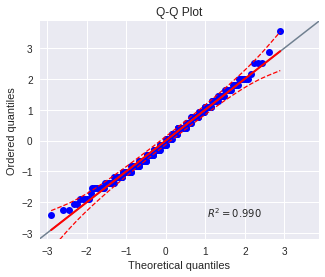

In [22]:
pg.qqplot(women['ageentry'], dist='norm')
plt.show()

Checking the normality of the distribution of the variable with the rule of thumb - are in the range (-1, 1) and the mean and median values are close to each other confirm that the variable has a normal distribution. The Q-Q Plot above also confirms that.
### Let's test the hypothesis that the expected age to move into a retirement centre was 74.
From previous data analysis, we know that the average age of a resident moving into the retirement centre was 75 years. So let's make a hypothesis:


Null hypothesis - the expected age to move into the retirement centre was 75 years<br>
Alternative hypothesis - the expected age to move into the retirement centre was 74 years.

Before we start the test, let's check whether the data on the age of moving into a retirement centre  is normally distributed.

In [23]:
data = df['ageentry']
alpha = 0.05
stat, p = stats.shapiro(data)
if p > alpha:
    print("Probably a normal distribution")
else:
    print("Probably not a normal distribution")
print('stat', stat, 'p-value:', p)

Probably not a normal distribution
stat 0.9906342029571533 p-value: 0.004963332787156105


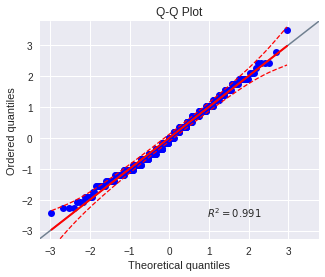

In [24]:
pg.qqplot(df['ageentry'], dist='norm')
plt.show()

In [25]:
df['ageentry'].mean(), df['ageentry'].median(), df['ageentry'].skew(), df['ageentry'].kurtosis()

(75.00649350649351, 75.0, 0.23942803190024586, -0.2542946498737333)

The rule of thumb and the QQplot plot indicate a normal distribution, also the histogram in the part for the analysis of this particular data confirmed it.
<br> So we can start testing the hypothesis.

In [26]:
mean = 75
confidence = 0.95
crit_value = np.abs(norm.ppf((1 - confidence) / 2))

print(np.mean(df['ageentry']) - crit_value * np.std(df['ageentry'])/np.sqrt(len(df['ageentry'])))
print(np.mean(df['ageentry']) +  crit_value * np.std(df['ageentry'])/ np.sqrt(len(df['ageentry'])))
        

74.48121324526653
75.5317737677205


The confidence intervals for the mean age at the date of moving into Channing House with a confidence level = 0.05. With a probability of 95%, we can say that the mean will be in the range of 74.48 - 75.53, so 74 is not in our confidence intervals.

To test the mean, I'm going to use a one-sample t-test. The test will compare the average age of 74 with the average age of the dataset.

In [28]:
#POPRAWIĆ output
stat, p = stats.ttest_1samp(a=df['ageentry'], popmean=74)
if p >= alpha:
    print('Accept null hypothesis that the means are equal')
else:
    print('Reject the null hypothesis that the means are equal')
print(stat, p)

Reject the null hypothesis that the means are equal
3.7514353105071705 0.00019823509651652597


The p-value is very low, indicating that we should reject the null hypothesis that the means are equal.
#### Let's find the skewness estimator for the variable describing the age of the resident and the confidence interval for it.
Can we say at a statistical significance of 5%, that the distribution of the age variable is symmetrical?

In [30]:
df['age'].skew()

0.04120113812724307

In [31]:
#create a sample of 1000 skews
skews = [stats.skew(np.random.choice(df['age'], size=len(df['age']), replace=True)) for i in range(1000)]

In [32]:
confidence = 0.95

In [34]:
#determine confidence intervals
np.quantile(skews, [(1 - confidence) / 2, (1 - (1 - confidence) / 2)])

array([-0.18319288,  0.27428771])

Yes, at a significance level of 5% we can say that the distribution of the variable age is symmetrical.